In [49]:
from jjutils.KMeansAnalysis import KMeansClustering
from jjutils.FileHandler import FileHandler
from jjutils.DataExplorer import DataFrameExplorer
from jjutils.DataProcessor import DataFrameCleaner

# Import and Cleaning Data

In [50]:
file_handler = FileHandler("../data/train.csv")
df = file_handler.read_csv()
data_cleaner = DataFrameCleaner(df)
# change PassengerID to string
data_cleaner.convert_data_types("PassengerId", "str")
# changed the Survived column to boolean
data_cleaner.convert_data_types("Survived", "bool")
# changing the Pclass column to category
data_cleaner.convert_data_types("Pclass", "category")
# convert Sex into a category
data_cleaner.convert_data_types("Sex", "category")
# changing the Age columng to int
data_cleaner.convert_data_types("Age", "int")
# changing cabin column to category
data_cleaner.convert_data_types("Cabin", "category")
# checking the Embarked column and correcting dtype
data_cleaner.convert_data_types("Embarked", "category")
# changing the index to PassengerId
data_cleaner.change_index("PassengerId")
df_clean = data_cleaner.get_cleaned_dataframe()
df_clean


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,True,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,False,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,False,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
888,True,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,NaN,S


# Exploring Data

             Survived Pclass  \
PassengerId                    
1               False      3   
2                True      1   
3                True      3   
4                True      1   
5               False      3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2          

/Users/jjespinoza/Documents/repos/jjutils/jjutils/DataExplorer.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  def check_missing_variables(self):


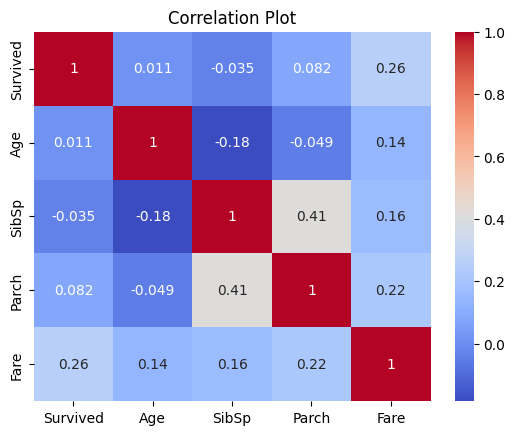

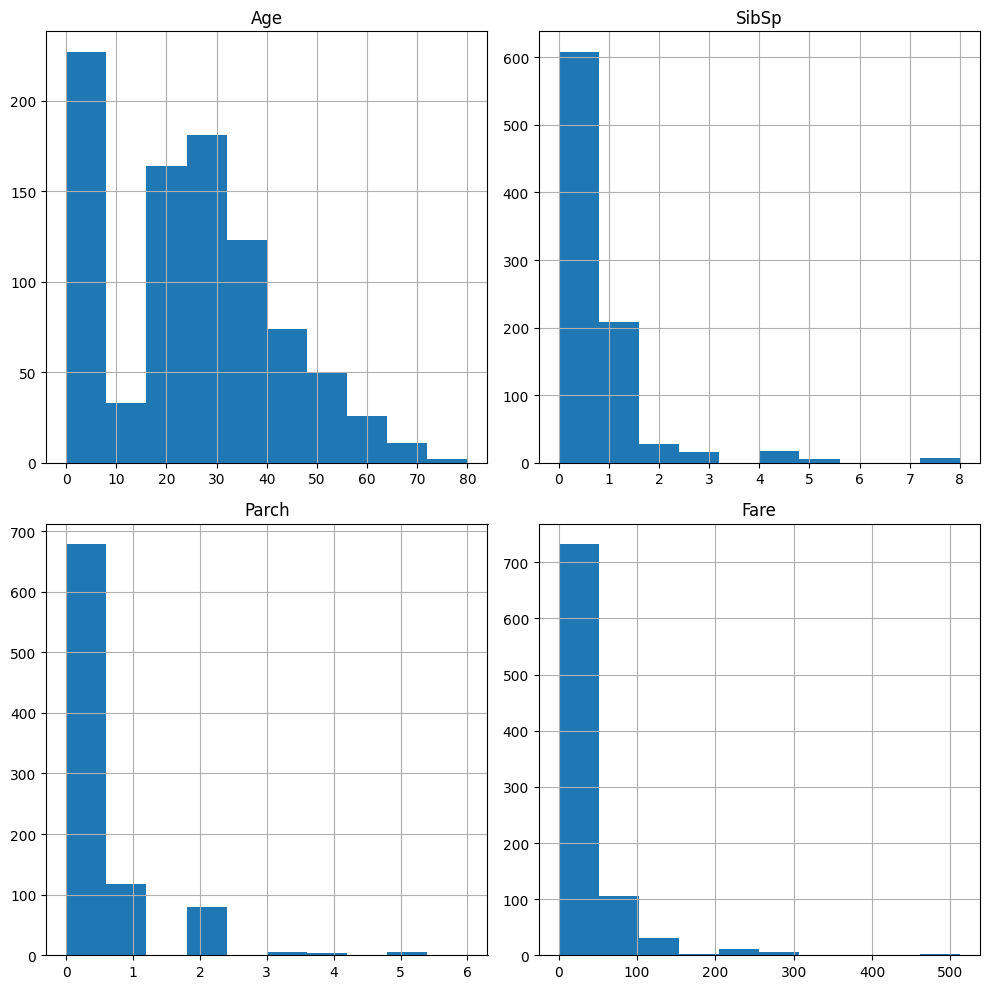

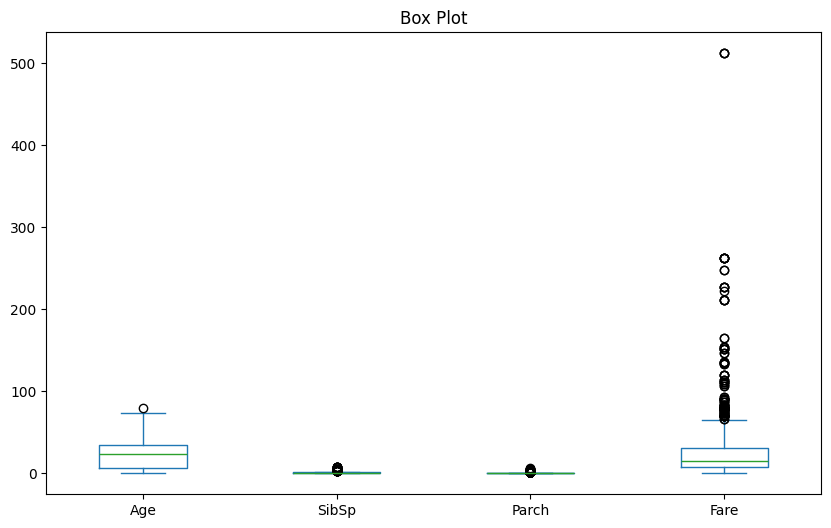

In [51]:
DataFrameExplorer(df_clean).run()


# K-Means Clustering Analysis

/Users/jjespinoza/Documents/repos/jjutils/jjutils-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jjespinoza/Documents/repos/jjutils/jjutils-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jjespinoza/Documents/repos/jjutils/jjutils-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jjespinoza/Documents/repos/jjutils/jjutils-ve

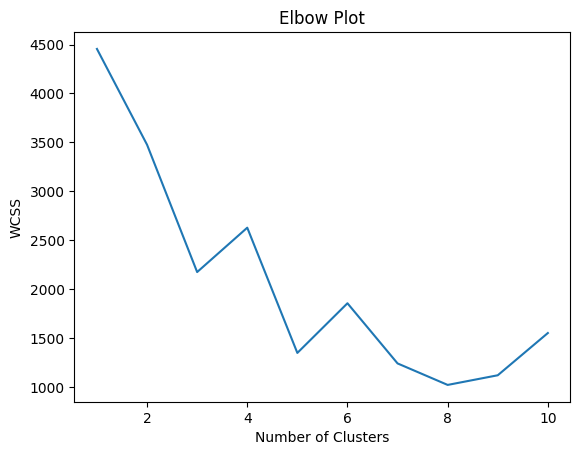

In [52]:

df_numeric = df_clean.select_dtypes(include=["int", "float", "bool"])
kmeans_clustering = KMeansClustering(df_numeric)
kmeans_clustering.scale_data()
kmeans_clustering.elbow_plot(max_clusters=10)

In [53]:
kmeans_clustering.cluster_data(num_clusters=3)

/Users/jjespinoza/Documents/repos/jjutils/jjutils-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
result = kmeans_clustering.data

,Survived,Age,SibSp,Parch,Fare,Cluster
PassengerId,,,,,,
1,False,22,1,0,7.2500,0
2,True,38,1,0,71.2833,1
3,True,26,0,0,7.9250,1
4,True,35,1,0,53.1000,1
5,False,35,0,0,8.0500,0
...,...,...,...,...,...,...
887,False,27,0,0,13.0000,0
888,True,19,0,0,30.0000,1
889,False,0,1,2,23.4500,2
